# Predicting house prices using k-nearest neighbors regression

In [4]:
import pandas as pd
import numpy as np

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

kc_small_data = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week6/kc_house_data_small.csv', dtype=dtype_dict)
train = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week6/kc_house_data_small_train.csv', dtype=dtype_dict)
test = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week6/kc_house_data_small_test.csv', dtype=dtype_dict)
validation = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week6/kc_house_data_validation.csv', dtype=dtype_dict)

In [114]:
len(train), len(test), len(validation), len(kc_small_data)

(5527, 1741, 1435, 8703)

In [2]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # add a constant column to an SFrame
    # prepend variable 'constant' to the features list
    features = ['constant'] + features
    # select the columns of data_SFrame given by the ‘features’ list into the SFrame ‘features_sframe’
    features_sframe = data_sframe[features]
    # this will convert the features_sframe into a numpy matrix with GraphLab Create >= 1.7!!
    features_matrix = np.array(features_sframe)
    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’
    output_sarray = data_sframe[output]
    # this will convert the SArray into a numpy array:
    output_sarray = np.array(output_sarray) # GraphLab Create>= 1.7!!
    return(features_matrix, output_sarray)

In [3]:
def normalize_features(features):
    norms = np.linalg.norm(features, axis=0)
    normalized_features = features / norms
    return (normalized_features, norms)

In [5]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [6]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms
features_valid = features_valid / norms # normalize validation set by training set norms

# Compute a single distance

In [7]:
print(features_test[0])

[ 0.01345102  0.01551285  0.01807473  0.01759212  0.00160518  0.017059    0.
  0.05102365  0.0116321   0.01564352  0.01362084  0.02481682  0.01350306
  0.          0.01345387 -0.01346922  0.01375926  0.0016225 ]


In [9]:
print(features_train[9])

[ 0.01345102  0.01163464  0.00602491  0.0083488   0.00050756  0.01279425
  0.          0.          0.01938684  0.01390535  0.0096309   0.
  0.01302544  0.          0.01346821 -0.01346251  0.01195898  0.00156612]


In [148]:
eucl_dist = np.sqrt( np.sum((features_test[0]-features_train[9])**2))
print(round(float(eucl_dist), 3))

0.06


In [13]:
len(features_train[0])

18

In [16]:
eucl_dist = []
for i in range(len(features_train[0:10])):
    eucl_dist.append([i, np.sqrt( np.sum((features_test[0]-features_train[i])**2))] )
eucl_dist

[[0, 0.060274709162955922],
 [1, 0.085468811476437465],
 [2, 0.061499464352793153],
 [3, 0.053402739792943632],
 [4, 0.05844484060170442],
 [5, 0.059879215098128345],
 [6, 0.054631404967754607],
 [7, 0.055431083236146074],
 [8, 0.052383627840220305],
 [9, 0.059723593713980783]]

In [123]:
diff_eucl = features_train[9] - features_test[0]
distances_eucl = np.sqrt(np.sum(diff**2, axis=1))
print(diff_eucl, distances_eucl)

[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -9.24331842e-03
  -1.09762322e-03  -4.26475103e-03   0.00000000e+00  -5.10236549e-02
   7.75473450e-03  -1.73816863e-03  -3.98994223e-03  -2.48168183e-02
  -4.77622244e-04   0.00000000e+00   1.43386859e-05   6.71397301e-06
  -1.80027678e-03  -5.63818921e-05] [ 0.06027471  0.08546881  0.06149946 ...,  0.05716729  0.05705739
  0.05846758]


In [33]:
for i in (0, 1, 2):
    print (features_train[i]-features_test[0])
    # should print 3 vectors of length 18

[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
   2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
  -1.63756198e-04   0.00000000e+00  -1.70254220e-05   1.29876855e-05
  -5.14364795e-03   6.69281453e-04]
[  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
   7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
  -1.91048898e-04   6.65082271e-02   4.23090220e-05   6.16364736e-06
  -2.89330197e-03   1.47606982e-03]
[  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
   1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
  -3.13866046e-04   0.00000000e+00   4.70885840e-05   1.56292487e-05
   3.72914476e-03   1.64764925e-03]


In [35]:
print( features_train[0:3] - features_test[0])

[[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
    2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
   -1.63756198e-04   0.00000000e+00  -1.70254220e-05   1.29876855e-05
   -5.14364795e-03   6.69281453e-04]
 [  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
    7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
   -1.91048898e-04   6.65082271e-02   4.23090220e-05   6.16364736e-06
   -2.89330197e-03   1.47606982e-03]
 [  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
    1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
   -3.13866046e-04   0.00000000e+00   4.70885840e-05   1.56292487e-05
    3.72914476e-03   1.64764925e-03]]


In [36]:
# verify that vectorization works
results = features_train[0:3] - features_test[0]
print( results[0] - (features_train[0]-features_test[0]))
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print( results[1] - (features_train[1]-features_test[0]))
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print( results[2] - (features_train[2]-features_test[0]))
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [37]:
diff = features_train - features_test[0]

In [121]:
diff

array([[  0.00000000e+00,  -3.87821276e-03,  -1.20498190e-02, ...,
          1.29876855e-05,  -5.14364795e-03,   6.69281453e-04],
       [  0.00000000e+00,  -3.87821276e-03,  -4.51868214e-03, ...,
          6.16364736e-06,  -2.89330197e-03,   1.47606982e-03],
       [  0.00000000e+00,  -7.75642553e-03,  -1.20498190e-02, ...,
          1.56292487e-05,   3.72914476e-03,   1.64764925e-03],
       ..., 
       [  0.00000000e+00,  -3.87821276e-03,  -3.01245476e-03, ...,
          5.43721749e-05,   8.35842791e-04,   7.02137088e-04],
       [  0.00000000e+00,   0.00000000e+00,  -3.01245476e-03, ...,
          2.28935473e-05,   2.44323277e-03,   8.20579624e-04],
       [  0.00000000e+00,  -3.87821276e-03,  -3.01245476e-03, ...,
          3.19188881e-06,  -3.92203156e-03,  -1.01041218e-03]])

In [39]:
print(diff[-1].sum())

-0.0934339987465


In [40]:
print( np.sum(diff**2, axis=1)[15] ) # take sum of squares across each row, and print the 16th sum
print( np.sum(diff[15]**2) ) # print the sum of squares for the 16th row -- should be same as above

0.00330705902846
0.00330705902846


In [41]:
distances = np.sqrt(np.sum(diff**2, axis=1))

In [122]:
distances

array([ 0.06027471,  0.08546881,  0.06149946, ...,  0.05716729,
        0.05705739,  0.05846758])

In [42]:
print( distances[100] ) # Euclidean distance between the query house and the 101th training house
# should print 0.0237082324496

0.0237082324167


In [124]:
def dist_from_query_to_train(train_set, query_house):
    diff = train_set - query_house
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return(distances)

In [125]:
features_test_2_dist = dist_from_query_to_train(features_train, features_test[2])

In [126]:
np.argmin(features_test_2_dist)

382

In [127]:
features_test_2_dist.min()

0.0028604955575117085

In [128]:
output_train[382]

249000.0

In [129]:
f_test_sorted = np.argsort(features_test_2_dist)

In [131]:
f_test_sorted[0:4]

array([ 382, 1149, 4087, 3142], dtype=int64)

# Perform k-nearest neighbor regression

In [132]:
def dist_from_query_to_k_train(k, train_set, query_house):
    diff = train_set - query_house
    distances = np.sqrt(np.sum(diff**2, axis=1))
    distances_sorted = np.argsort(distances)
    return(distances_sorted[0:k])

In [133]:
dist_from_query_to_k_train(4, features_train, features_test[2])

array([ 382, 1149, 4087, 3142], dtype=int64)

# Make a single prediction by averaging k nearest neighbor outputs

In [134]:
def average_dist_from_query_to_k_train(k, train_set, train_output, query_house):
    diff = train_set - query_house
    distances = np.sqrt(np.sum(diff**2, axis=1))
    distances_sorted = np.argsort(distances)
    predicted_output = train_output[distances_sorted[0:k]]
    mean_prediction = sum(predicted_output)/len(predicted_output)
    return(mean_prediction)

In [135]:
average_dist_from_query_to_k_train(4, features_train, output_train, features_test[2])

413987.5

In [149]:
quiz_question_6 = round(float(average_dist_from_query_to_k_train(4, features_train, output_train, features_test[2])), 0)
quiz_question_6

413988.0

# Make multiple predictions

In [138]:
def multiple_average_dist_from_query_to_k_train(k, train_set, train_output, query_set):
    mean_prediction = []
    for i in range(0, query_set.shape[0]):
        diff = train_set - query_set[i]
        distances = np.sqrt(np.sum(diff**2, axis=1))
        distances_sorted = np.argsort(distances)
        predicted_output = train_output[distances_sorted[0:k]]
        mean_prediction_i = sum(predicted_output)/len(predicted_output)
        mean_prediction.append(mean_prediction_i)
    return(mean_prediction)

In [139]:
k10_neighbors = multiple_average_dist_from_query_to_k_train(10, features_train, output_train, features_test[0:10])

In [140]:
np.argmin(k10_neighbors)

6

In [141]:
k10_neighbors[np.argmin(k10_neighbors)]

350032.0

# Choosing the best value of k using a validation set

In [142]:
rss_all = []
for i in range(1, 15):
    #Makes predictions for each house in the VALIDATION set using the k-nearest neighbors from the TRAINING set.
    k_neighbours = multiple_average_dist_from_query_to_k_train(i, features_train, output_train, features_valid)
    #Computes the RSS for these predictions on the VALIDATION set
    RSS = sum((k_neighbours - output_valid)**2)
    #Stores the RSS computed above in rss_all
    rss_all.append(RSS)
#Report which k produced the lowest RSS on VALIDATION set.
print(np.argmin(rss_all))

7


In [143]:
rss_all

[105453830251561.0,
 83445073504025.5,
 72692096019202.797,
 71946721652091.688,
 69846517419718.586,
 68899544353181.094,
 68341973450051.055,
 67361678735491.5,
 68372727958976.336,
 69335048668556.703,
 69523855215598.875,
 69049969587246.453,
 70011254508263.625,
 70908698869034.438]

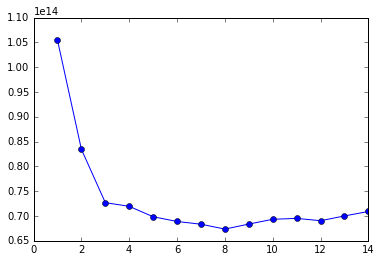

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 15)
plt.plot(kvals, rss_all,'bo-')

In [145]:
k_neighbours_test = multiple_average_dist_from_query_to_k_train(8, features_train, output_train, features_test)
RSS = sum((k_neighbours_test - output_test)**2)

In [146]:
print(RSS)

1.33118823552e+14
